In [47]:
import pandas as pd
import geopandas as gpd
import json
from shapely.geometry import shape
from shapely import wkt
from matplotlib import pyplot as plt

## 1. 한국 시 경계 불러오기

### 1-1. city df to city gdf

In [24]:
city_df = pd.read_csv('../dataset/korea_city_boundary.csv')
# WTK 열의 폴리곤 데이터를 geometry 객체로 변환
city_df['WTK'] = city_df['WTK'].apply(wkt.loads)
city_gdf = gpd.GeoDataFrame(city_df, geometry='WTK')
city_gdf = city_gdf.set_geometry('WTK')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   City      254 non-null    object  
 1   WTK       254 non-null    geometry
 2   Province  254 non-null    object  
dtypes: geometry(1), object(2)
memory usage: 6.1+ KB


<AxesSubplot:>

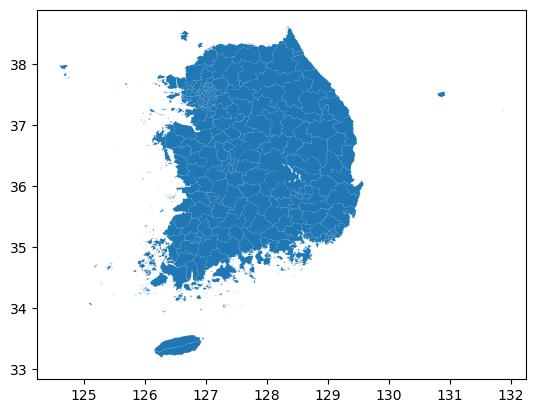

In [25]:
# geo pandas 요약 정보
city_gdf.info()
city_gdf.describe()
city_gdf.plot()

## 2. 더대시 데이터 셋에서 시별 데이터 뽑아내기

In [75]:
df = pd.read_excel("../dataset/dataset.xlsx",index_col=False)
df['geometry'] = df['geometry'].apply(lambda x: shape(json.loads(x)))
df = gpd.GeoDataFrame(df,geometry='geometry')

## 3. 시/군/구 경계 plot

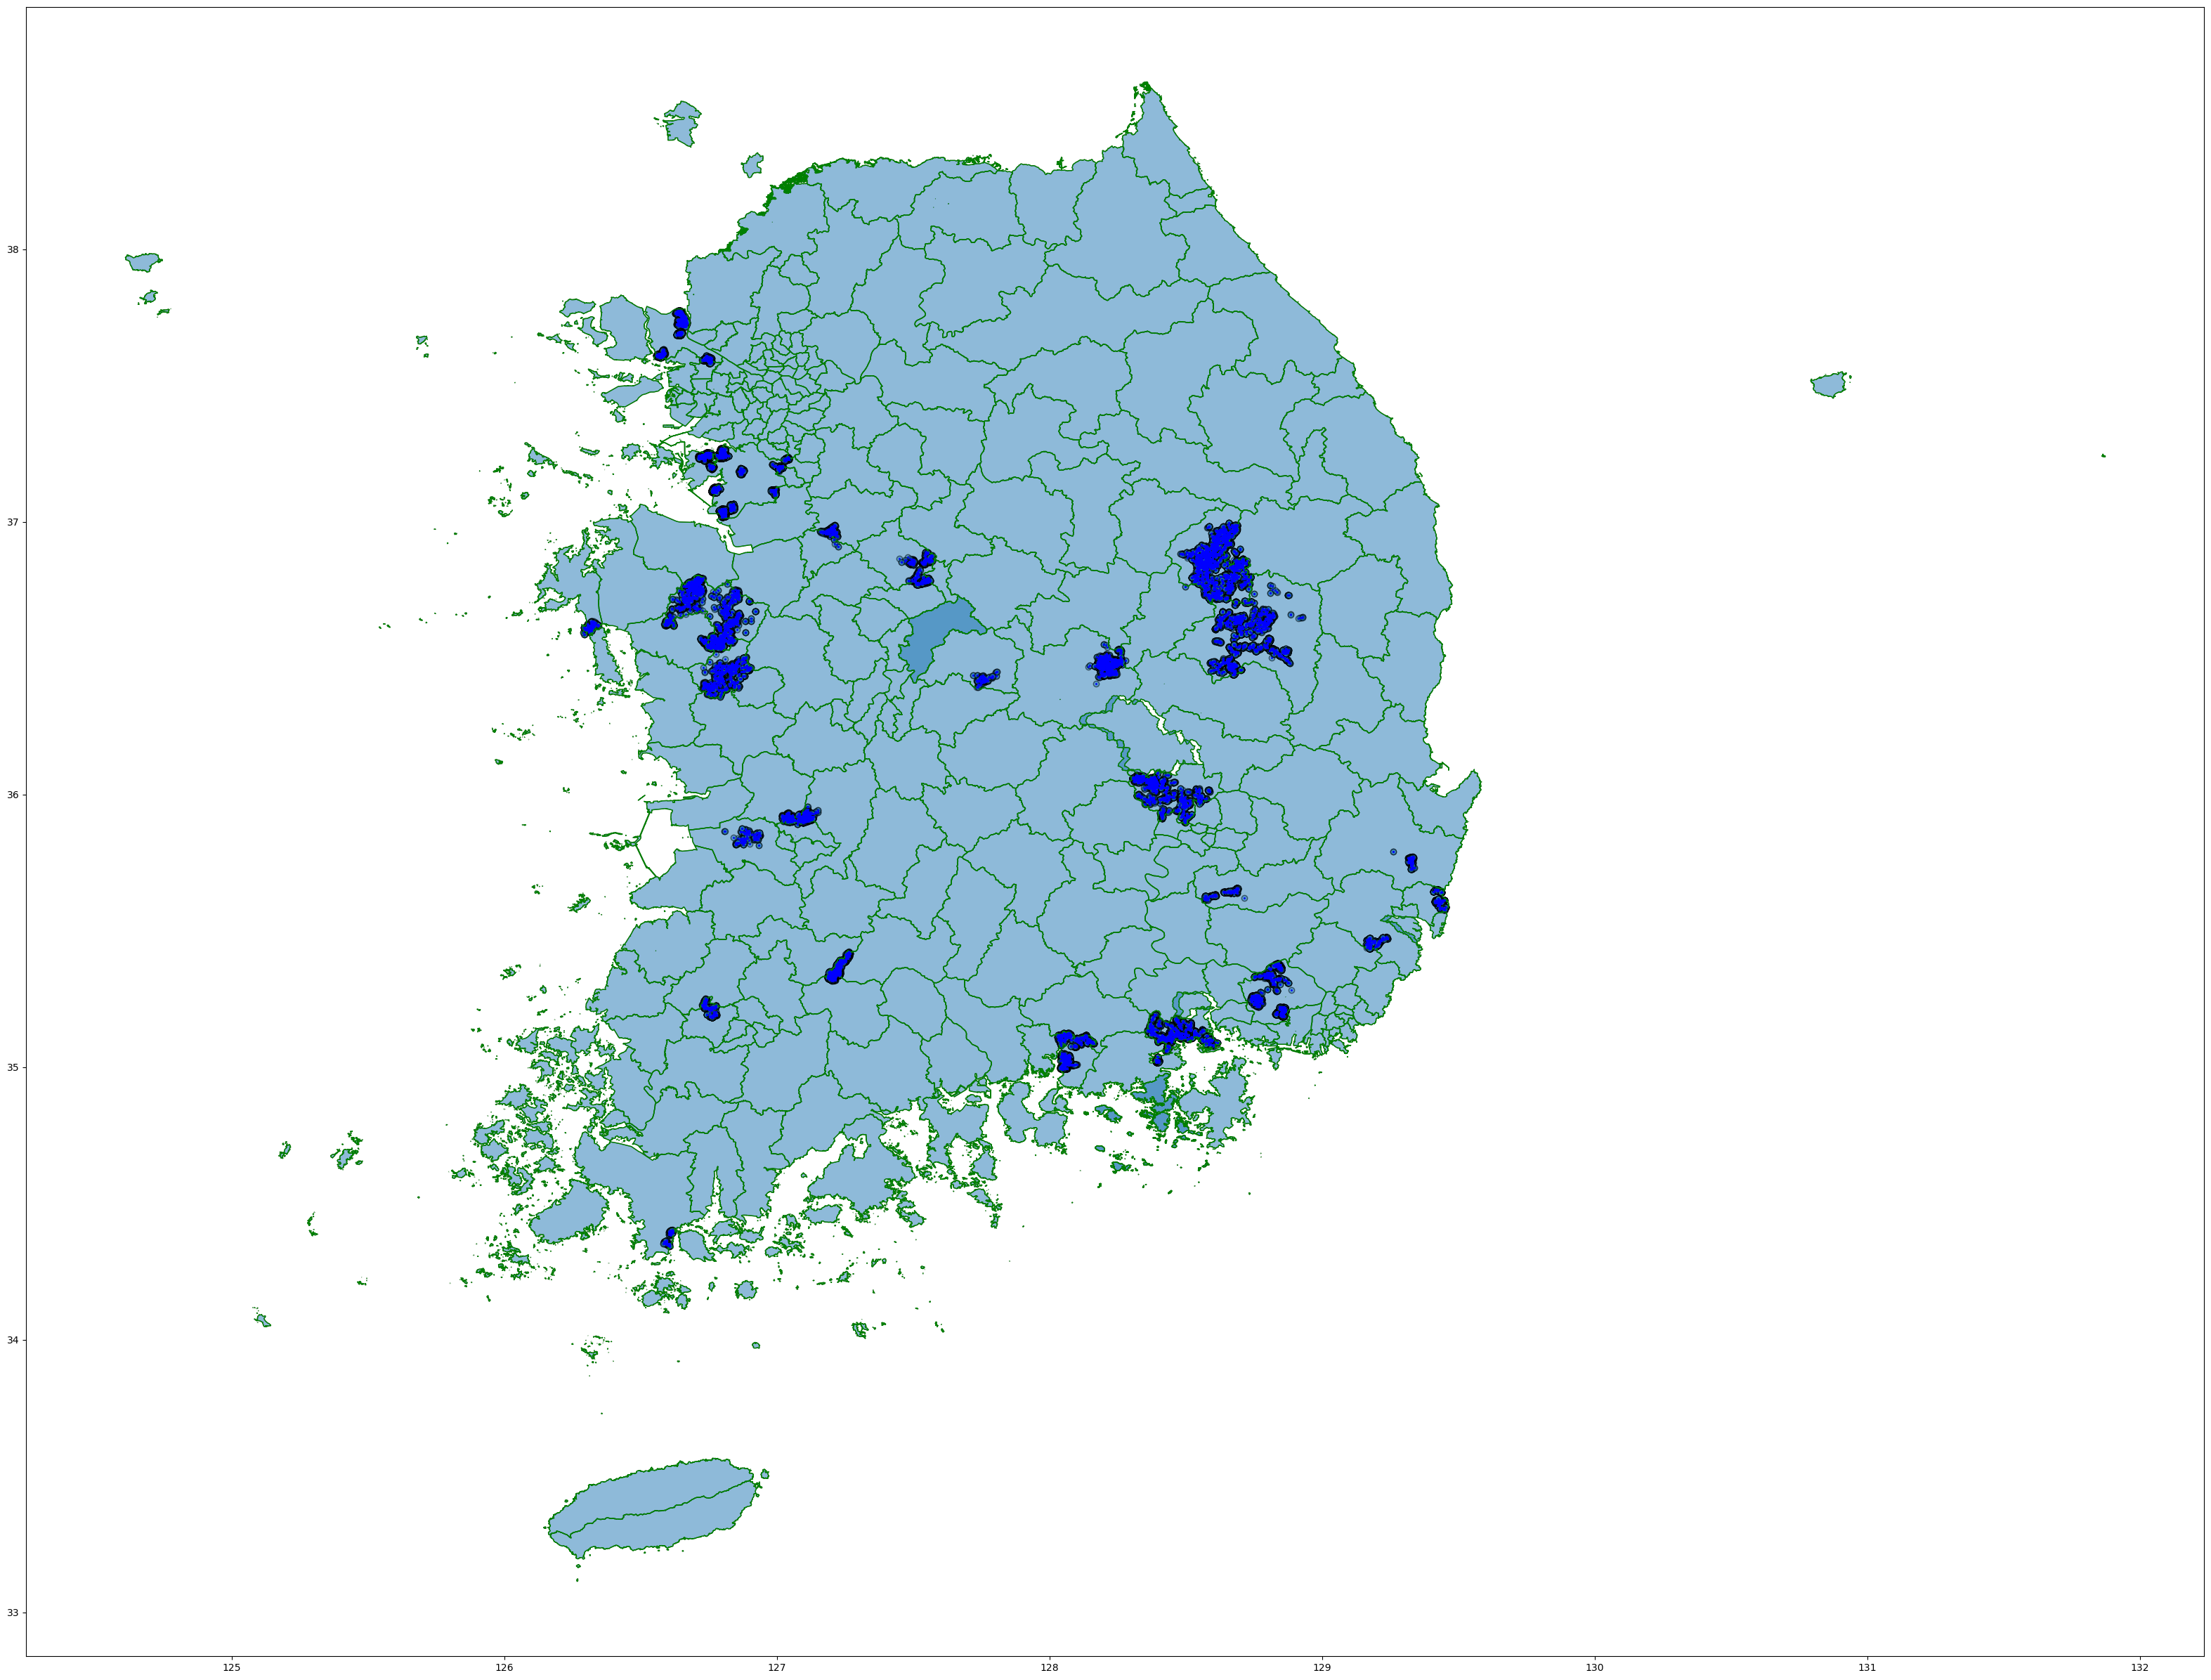

In [27]:
global_point_data = gpd.GeoDataFrame(geometry=gpd.points_from_xy(df.x,df.y))
global_city_boundary_and_point = gpd.GeoDataFrame(geometry=city_gdf.geometry.append([global_point_data.geometry]))

# plot the GeoDataFrame
ax = global_city_boundary_and_point.plot(figsize=(40,40), alpha=0.5, edgecolor='k')
city_gdf.plot(ax=ax,facecolor='none',edgecolor='g')
global_point_data.plot(ax=ax, color='b', markersize=1)
plt.show()

# 특정 City Boundary 지도 위에 토지 scatter

Province와 District를 이용해, District plot

In [35]:
# 테스트 용 필지 정보
test_city_info = df.iloc[0][['Province','City','Street']]
# 테스트 정보와 같은 도만 추출 (다른 도 내 같은 이름을 가진 시 군 구를 막기 위함)
local_province_boundary = city_gdf.loc[(city_gdf['Province']==test_city_info['Province'])]
# 테스트 정보와 같은 도내 같은 시 경계만 추출
local_city_boundary = local_province_boundary.loc[(local_province_boundary['City']==test_city_info['City'])]

   City                                                WTK Province
68  안동시  POLYGON ((128.80536 36.81378, 128.80517 36.813...       경북


<AxesSubplot:>

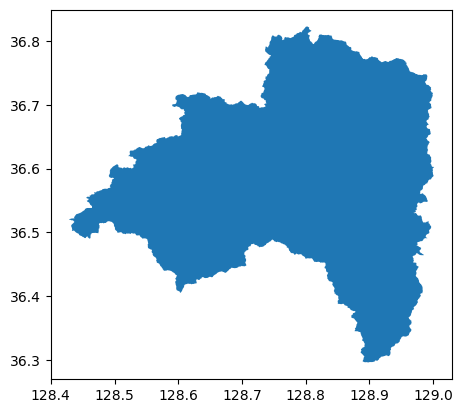

In [36]:
print(local_city_boundary)
local_city_boundary.plot()

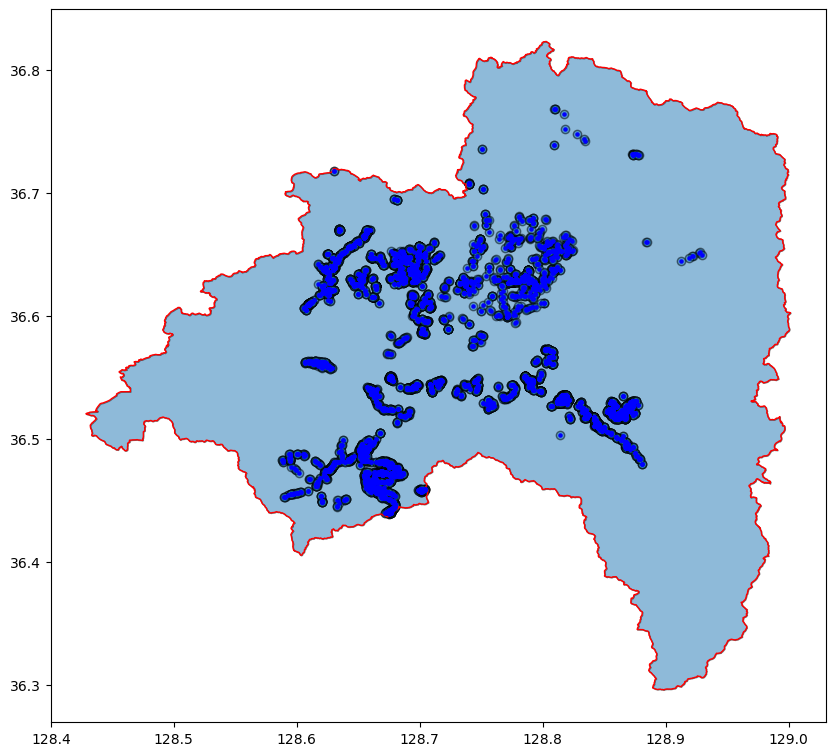

In [88]:
# 특정 시 내에 속한 필지(포인트) 정보 추출
test_city_point = df.loc[df['City']==test_city_info['City']]
# 특정 시 내에 속한 필지 정보 geometry 변환
local_city_point = gpd.GeoDataFrame(geometry=gpd.points_from_xy(test_city_point.x,test_city_point.y))
local_city_boundary_and_point = gpd.GeoDataFrame(geometry=local_city_boundary.geometry.append([local_city_point.geometry]))

# plot the GeoDataFrame
ax = local_city_boundary_and_point.plot(figsize=(10,10), alpha=0.5, edgecolor='k')
local_city_boundary.plot(ax=ax, facecolor='none', edgecolor='r')
local_city_point.plot(ax=ax, color='b', markersize=5)
plt.show()

<AxesSubplot:>

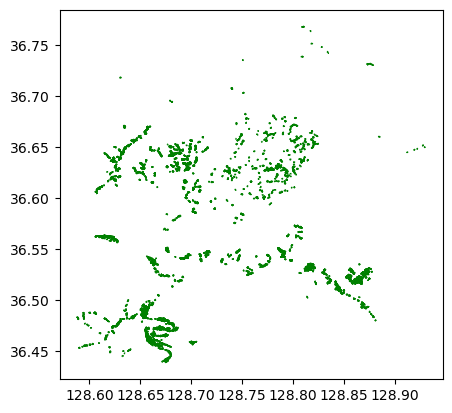